# <center> BDA Final Project

## Product Recommendation System for e-commerce businesses
A well-developed recommendation system will help businesses improve their shopper's website experience and customer acquisition and retention.

The recommendation system, We have designed below is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

The recommendation system is designed in 3 parts

* **Recommendation system part I:** Product pupularity based system targetted at new customers

* **Recommendation system part II:** Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

* **Recommendation system part III:** When a business is setting up its e-commerce website for the first time withou any product rating

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Datasets" data-toc-modified-id="Loading-Datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Datasets</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Recommender-Systems" data-toc-modified-id="Recommender-Systems-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recommender Systems</a></span><ul class="toc-item"><li><span><a href="#Popularity-Based-Recommender" data-toc-modified-id="Popularity-Based-Recommender-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Popularity-Based Recommender</a></span></li><li><span><a href="#Collaborative-Recommender" data-toc-modified-id="Collaborative-Recommender-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Collaborative Recommender</a></span><ul class="toc-item"><li><span><a href="#SVD:-Matrix-Factorization-Based-Algorithm" data-toc-modified-id="SVD:-Matrix-Factorization-Based-Algorithm-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>SVD: Matrix Factorization Based Algorithm</a></span></li></ul></li><li><span><a href="#Hybrid-Recommender" data-toc-modified-id="Hybrid-Recommender-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Item to item based recommendation system based on product description</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Recommendation System - Part I
### Product popularity based recommendation system targeted at new customers
* Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.
[[](http://)](http://)
* **Dataset : **[Amazon product review dataset](https://www.kaggle.com/skillsmuggler/amazon-ratings)

#### Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [5]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [6]:

missing_data = pd.DataFrame(amazon_ratings.isnull().mean()*100)
missing_data

,0
UserId,0.0
ProductId,0.0
Rating,0.0
Timestamp,0.0


All the columns are clean

In [7]:
amazon_ratings.shape

(2023070, 4)

### Exploratory Data Analysis

In [8]:
# IQR
Q1 = np.percentile(amazon_ratings['Rating'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(amazon_ratings['Rating'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


# Above Upper bound
upper = amazon_ratings['Rating'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = amazon_ratings['Rating'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0          False
1          False
2          False
3          False
4          False
           ...  
2023065    False
2023066    False
2023067    False
2023068    False
2023069    False
Name: Rating, Length: 2023070, dtype: bool
(array([], dtype=int64),)
Lower bound: 0          False
1          False
2          False
3          False
4           True
           ...  
2023065    False
2023066    False
2023067    False
2023068    False
2023069    False
Name: Rating, Length: 2023070, dtype: bool
(array([      4,      23,      30, ..., 2022846, 2022913, 2022969],
      dtype=int64),)


C:\Users\Shaizan Ahmed\AppData\Local\Temp\ipykernel_1988\2574857160.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(amazon_ratings['Rating'], 25,
C:\Users\Shaizan Ahmed\AppData\Local\Temp\ipykernel_1988\2574857160.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(amazon_ratings['Rating'], 75,


In [9]:
amazon_ratings['Rating'][3]


4.0

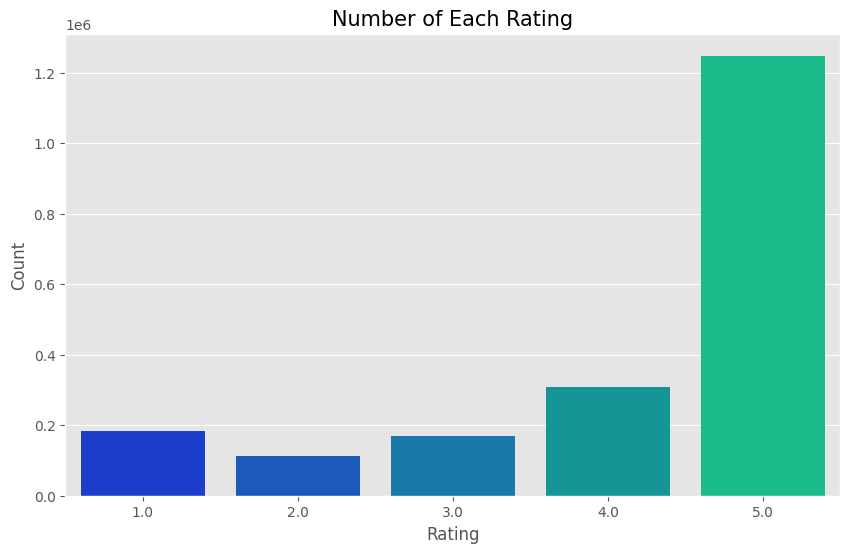

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=amazon_ratings, palette='winter')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Each Rating', fontsize=15)
plt.show()

<center>We can see that most of users rated 5 for the products.

In [19]:
df_rating=pd.DataFrame({'Number of Rating':amazon_ratings.groupby('ProductId').count()['Rating'], 'Mean Rating':amazon_ratings.groupby('ProductId').mean()['Rating']})

In [20]:
df_rating.head()

,Number of Rating,Mean Rating
ProductId,,
0205616461,1,5.0
0558925278,2,4.0
0733001998,1,4.0
0737104473,1,1.0
0762451459,1,5.0


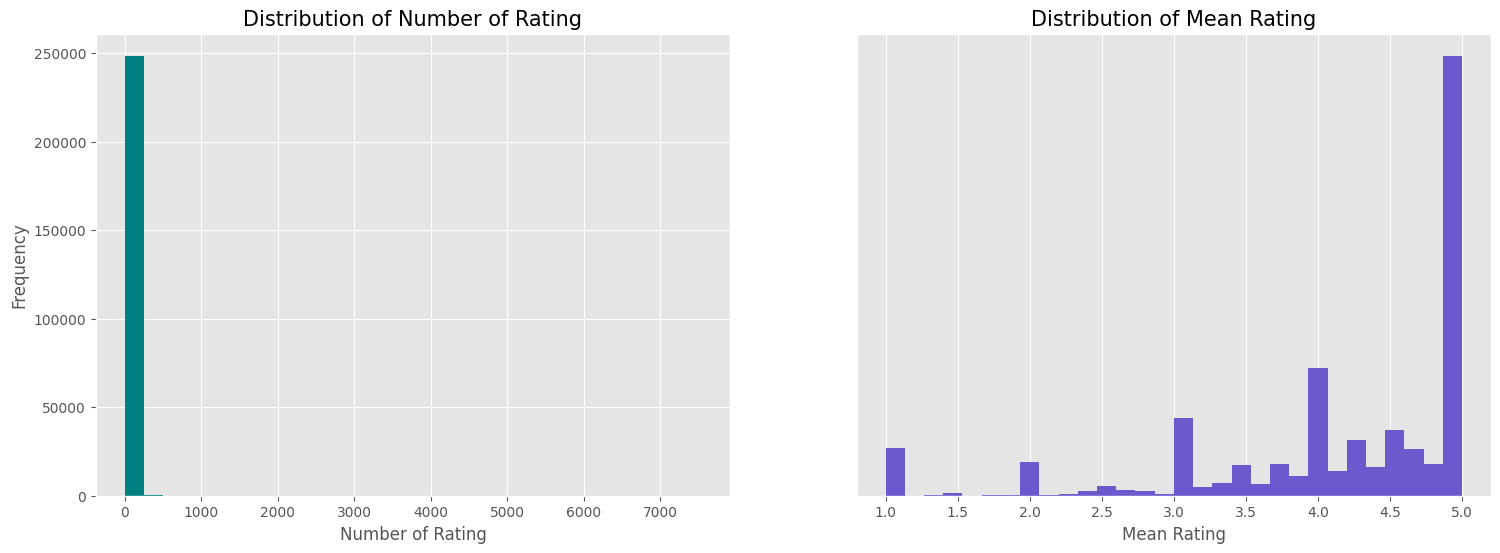

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_rating,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=15)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

From these histograms we can see that most of the number of ratings are between 0 and 1825, and most of the products have a mean rating of 5.

We create a scatter plot to observe the relationship between Number of Rating and Mean Rating.

<Figure size 800x600 with 0 Axes>

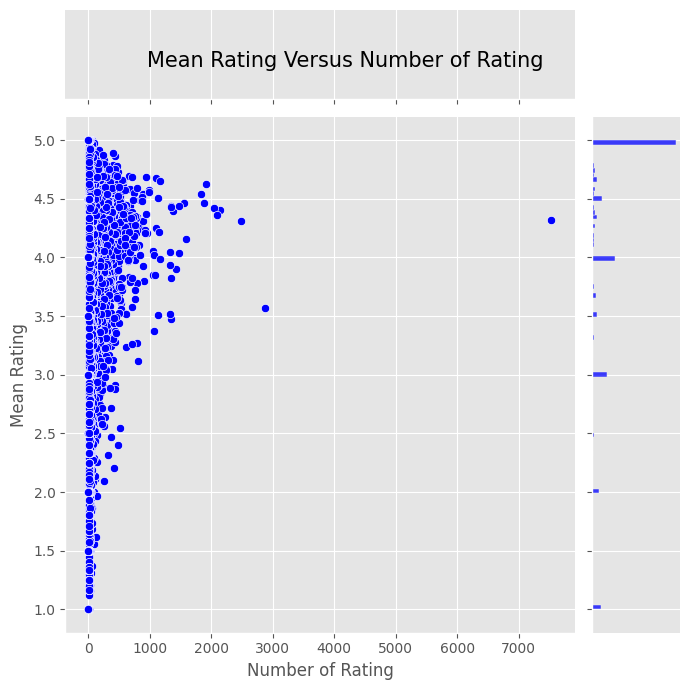

In [25]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Number of Rating', y='Mean Rating',data=df_rating,color='b', height=7)
plt.suptitle('Mean Rating Versus Number of Rating', fontsize=15, y=0.92)

plt.show()

### Top products based on sales

In [13]:
#Top 10 Products based on sales.
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='ProductId'>

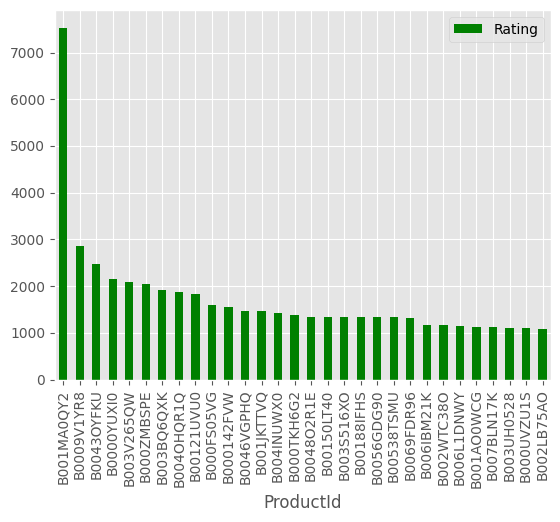

In [15]:
most_popular.head(30).plot(kind = "bar", color='g')

** Analysis:**

* The above graph gives us the most popular products (arranged in descending order) sold by the business.

* For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of  3000, etc.     

### Number of Unique users

In [28]:
print('Number of unique users', len(amazon_ratings['UserId'].unique()))

Number of unique users 1210271


### Number of Products with good ratings

In [29]:
max_ratings1 = amazon_ratings[amazon_ratings['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings1['ProductId'].unique()))

Number of unique products rated high 220746


### Model Preparation

In [30]:
#Now we will drop timestamp column as it isn't much of help.

amazon_ratings.drop('Timestamp',axis=1,inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(amazon_ratings, test_size = 0.2, random_state=0)

In [32]:
train_data.head()

,UserId,ProductId,Rating
1820811,A3T41HVBC1PSCO,B00B1OOZU0,5.0
1541414,A24Y7P9O9LU6TH,B006Z9ACMG,5.0
783039,A1F7YU6O5RU432,B001T8MD8Y,5.0
1699677,A1HCJ5CDLNWJPJ,B008U4AR3I,5.0
787779,APDELNTXEZAX4,B001TXFMD2,4.0


In [33]:

test_data.head()

,UserId,ProductId,Rating
723411,A23ZJBVZ4OLDJ,B001KNHM4I,3.0
1472875,A3O52IDYQ4Z66H,B0062U1QC8,4.0
2000120,A1PDYBT822BHNJ,B00I14O9C2,5.0
2014061,A14F5W1N7CZDVW,B00JDTFBR6,5.0
1076951,A2EPK0CT24CZHS,B003O3C06M,4.0


In [34]:
train_data_grouped = train_data.groupby('ProductId').mean().reset_index()

In [35]:

train_data_grouped.head()

,ProductId,Rating
0,0558925278,3.0
1,0733001998,4.0
2,0737104473,1.0
3,0762451459,5.0
4,1304139220,5.0


In [36]:
train_data.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head(10)

ProductId
B001MA0QY2    5978
B0009V1YR8    2266
B0043OYFKU    1998
B0000YUXI0    1711
B003V265QW    1704
B000ZMBSPE    1649
B003BQ6QXK    1555
B004OHQR1Q    1505
B00121UVU0    1457
B000FS05VG    1266
Name: Rating, dtype: int64

In [37]:
train_data_sort = train_data_grouped.sort_values(['Rating', 'ProductId'], ascending=False)

In [38]:

train_data_sort.head()

,ProductId,Rating
226740,B00LU0LTOU,5.0
226739,B00LPVG6V0,5.0
226738,B00LP2YB8E,5.0
226737,B00LOS7MEE,5.0
226736,B00LORWRJA,5.0


### Model 1: Popularity based recommender model

The implementation of Popularity-Based Filtering is straighforward. All we have to do is sort our products based on ratings, and display the top products of our list. Therefore, we should;

- Create a metric to score or rate the products.
- Calculate the score for every product.
- Sort the scores and recommend the best rated product to the users.

We can use the average ratings of the products as the score but using this will not be fair enough since a product with 5average rating and only43 votes cannot be considered better than the product with 4 as average rating but 40 votes. So, we use IMDB's weighted rating formula to score the products, as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$ 

- v: the number of votes for the product

- m: the minimum votes required to be listed in the chart

- R: the average rating of the product

- C: the mean vote across the whole report

In [26]:
df_rating['Mean Rating'].mean()

4.149251141223176

The mean rating for all the products (C) is 4.1 on a scale of 5.

The next step is to determine an appropriate value for m, the minimum number of votes required for a product to be listed in the chart. We use 90th percentile as our cutoff. In other words, for a product to feature in the charts, the number of its votes should be higher than that of 90% of the products in the list.

In [50]:
df_rating['Number of Rating'].quantile(q=0.9)

15.0

Now, we filter the products that qualify for the chart and put them in a new dataframe called df_filtered.

Now, we calculate score for each qualified product. To do this, we define a function, weighted_rating(), and apply this function to the DataFrame of qualified products.

In [54]:
def product_score(x):
    v=x['Number of Rating']
    m=df_rating['Number of Rating'].quantile(q=0.9)
    R=x['Mean Rating']
    C=df_rating['Mean Rating'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [55]:
df_filtered['score']=df_filtered.apply(product_score, axis=1)

C:\Users\Shaizan Ahmed\AppData\Local\Temp\ipykernel_1988\682934750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['score']=df_filtered.apply(product_score, axis=1)


In [56]:
df_filtered.head()


,Number of Rating,Mean Rating,score
ProductId,,,
1304351475,16,3.562500,3.846412
3227001381,25,4.560000,4.405969
7535842801,17,4.470588,4.319961
7806397051,35,3.285714,3.544775
9746427962,41,4.609756,4.486407


Finally, we sort the dataframe based on the score feature, and we output the the top 10 popular products.

In [57]:
df_highscore=df_filtered.sort_values(by='score', ascending=False).head(10)

In [51]:
df_filtered=df_rating[df_rating['Number of Rating']>df_rating['Number of Rating'].quantile(q=0.9)]

In [52]:
df_filtered.shape

(23863, 2)

We see that there are 23863 products which qualify to be in this list.

In [58]:
df_highscore

,Number of Rating,Mean Rating,score
ProductId,,,
B00GJX58PE,398,4.889447,4.862564
B00K7ER6LU,85,4.976471,4.852388
B00I46E8DC,172,4.912791,4.851544
B00F008GFQ,426,4.868545,4.844079
B002YFN49I,98,4.948980,4.842821
B00FPROWWU,79,4.962025,4.832327
B00IBS9QC6,239,4.874477,4.831649
B009OWSHQE,88,4.943182,4.827561
B004CNRDBU,58,5.000000,4.825189


In [61]:
df_highscore.index


Index(['B00GJX58PE', 'B00K7ER6LU', 'B00I46E8DC', 'B00F008GFQ', 'B002YFN49I',
       'B00FPROWWU', 'B00IBS9QC6', 'B009OWSHQE', 'B004CNRDBU', 'B008DWSJ1O'],
      dtype='object', name='ProductId')

So the top 10 popular products that this model will recommend to users include:

'B00GJX58PE', 'B00K7ER6LU', 'B00I46E8DC', 'B00F008GFQ', 'B002YFN49I',
 'B00FPROWWU', 'B00IBS9QC6', 'B009OWSHQE', 'B004CNRDBU', 'B008DWSJ1O'.

We should keep in mind that this popularity-based recommender provides a general chart of recommended products to all the users, regardless of the user's personal taste. It is not sensitive to the interests and tastes of a particular user, and it does not give personalized recommendations based on the users.

## Recommendation System - Part II
### Model-based collaborative filtering system

* Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
* A model based collaborative filtering technique is closen here as it helps in making predicting products for a particular user by identifying patterns based on preferences from multiple user data.


* Surprise library is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. Here we also use the Surprise library that uses extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise Root Mean Square Error (RMSE) that is measured by Kfold Cross Validation and give great recommendations.

#### Utility Matrix based on products sold and user reviews
**Utility Matrix : **An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [96]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
%matplotlib inline
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate

In [64]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

Since data is too huge, due to that colab(free version) wasn't able to process it properly. So inorder to work properly a subset is taken which is top users who had given more than 50 ratings.

In [72]:

userID = amazon_ratings.groupby('UserId').count()

In [73]:
top_user = userID[userID['Rating'] >= 50].index

In [74]:
topuser_ratings_df = amazon_ratings[amazon_ratings['UserId'].isin(top_user)]

In [75]:
topuser_ratings_df.sort_values(by='Rating', ascending=False).head()

,UserId,ProductId,Rating
5,AKJHHD5VEH7VG,0762451459,5.0
1779178,ACZ94JB8BFMJ9,B00A9MKPT0,5.0
1778023,A10G136JEISLVR,B00A8I8AVA,5.0
1778730,A1Z54EM24Y40LL,B00A8S6HM4,5.0
1778920,A2K7V3G4598QRF,B00A93VUEI,5.0


In [77]:
prodID = amazon_ratings.groupby('ProductId').count()

In [80]:
top_prod = prodID[prodID['Rating'] >= 50].index

In [81]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['ProductId'].isin(top_prod)]

In [82]:
top_ratings_df.sort_values(by='Rating', ascending=False).head()

,UserId,ProductId,Rating
1717,A2FQZKL2KIZACO,9790790961,5.0
1436380,A2S7YBFPZX1IGQ,B005OZW3ZG,5.0
1435690,A1APERZNMEU8PW,B005OZGDO8,5.0
1435806,A1YVJ2CLK0L2WR,B005OZH88I,5.0
1435808,ADMPGWBF0BC9W,B005OZH88I,5.0


In [83]:

top_ratings_df.shape

(13717, 3)

Here we can see the top rated products are 13717

#### Conversion to surprise format

In [84]:

reader = Reader(rating_scale=(0.5, 5.0))

Dataset loading

In [85]:
data = Dataset.load_from_df(top_ratings_df[['UserId', 'ProductId', 'Rating']],reader)

#### Model training

In [86]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [87]:

type(trainset)

surprise.trainset.Trainset

#### KNN with means

In [88]:
model = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


### SVD

In [193]:
svd = SVD()

In [194]:
reader = Reader()

In [195]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0256  1.0031  1.0514  1.0049  0.9968  1.0164  0.0200  
MAE (testset)     0.7880  0.7697  0.7966  0.7741  0.7644  0.7786  0.0119  
Fit time          0.08    0.07    0.08    0.09    0.10    0.09    0.01    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'test_rmse': array([1.02564675, 1.00307169, 1.05141812, 1.00488318, 0.99676726]),
 'test_mae': array([0.78803342, 0.76968707, 0.79655694, 0.77414787, 0.76435677]),
 'fit_time': (0.08107352256774902,
  0.0740668773651123,
  0.07807135581970215,
  0.094085693359375,
  0.10109210014343262),
 'test_time': (0.02302098274230957,
  0.02302098274230957,
  0.024021387100219727,
  0.02402186393737793,
  0.02402210235595703)}

We get a mean Root Mean Sqaure Error of 1.0 approx which is good enough for our case. Let us now train on our dataset and arrive at predictions.

In [196]:
trainset = data.build_full_trainset()

In [197]:
svd.fit(trainset)

Let us pick the user with userId of 'AKM1MP6P0OYPR' and check the ratings she/he has given so far to different products.

In [198]:
amazon_ratings[amazon_ratings['UserId'] == 'A1APERZNMEU8PW']

,UserId,ProductId,Rating
107823,A1APERZNMEU8PW,B000662MYK,5.0
214884,A1APERZNMEU8PW,B000CED0VK,5.0
286352,A1APERZNMEU8PW,B000HM5LHI,5.0
458980,A1APERZNMEU8PW,B000VWQAXS,4.0
467230,A1APERZNMEU8PW,B000WNLFBI,5.0
...,...,...,...
1742895,A1APERZNMEU8PW,B009L11BPC,5.0
1747960,A1APERZNMEU8PW,B009P0K7M2,5.0
1747977,A1APERZNMEU8PW,B009P0KDBC,5.0
1783972,A1APERZNMEU8PW,B00AD9R6DM,5.0


As an example, we use the algorithm to predict the score that might be given to the productId of '0970407998' by this specific userId.

In [225]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None)

Prediction(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None, est=4.120871910767661, details={'was_impossible': False})

In [226]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None).est

4.120871910767661

Our model predicts that userId of 'A17HMM1M7T9PJ1' will give 4.12 as the rating for productId of '0970407998'.

#### Hyper Parameter Tuning of SVD model

In [220]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [221]:
gs.fit(data)

In [222]:
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [223]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8962


0.8961906299073964

The RMSE value of collaborative model, at first by KNNwithmeans is 1.05 and with SVD is 1.01. On further tuning of SVD model we got <b>RMSE of SVD model as 0.896 which is much better.

### Recommending 5 Products.

In [227]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [228]:
top_n = get_top_n(test_pred, n=5)

In [229]:

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A25C2M3QF9G7OQ ['B00GTC0DFK', 'B008VSYO5A', 'B006L6A06Q', 'B009FKNGRA', 'B009YSSLAU']
AY3D7DG5L5WCK ['B00AE078TM', 'B00A0J09C0', 'B00AWLB9G6', 'B00AAIOP44', 'B002MO9BW0']
A2DPYMNI2HCIOI ['B0002VQ0WO', 'B00AE078YM', 'B008RVYJS8', 'B0014AX89K', 'B00014D5O8']
A2Y4S4CNGKF21S ['B000C1W6TK', 'B000U4WNC4', 'B000052YJX', 'B0009PVV36', 'B001H54SQ4']
AYB4ELCS5AM8P ['B00GTC1HB4', 'B00A0J084Y', 'B001ECQ55M', 'B00GTC1HCI', 'B004GIM68G']
A3GPAR4H5Y5OU8 ['B0037LKIAG', 'B0040PDKPI', 'B000GUN98O', 'B001JQLNNC', 'B001S48HLG']
A3IOCPLIMYDBCD ['B000ASDGK8', 'B003156NMU', 'B003V265QW', 'B002QXINAS', 'B00365DABC']
ALNFHVS3SC4FV ['B009YSSLAU', 'B00AE07BI0', 'B00AE07BMQ', 'B003V21WO2', 'B00AWLB9I4']
AQY5XBYSENNZQ ['B009FKNGGQ', 'B00AE0790U', 'B00GTBZHUW', 'B002MO780W', 'B00GYB17TC']
A3091RP0SPZLMN ['B00ALV8EJM', 'B00GTC02LA', 'B00AE07FUE', 'B00AE07CTI', 'B002MO3CG6']
A3AZI828WJN1CD ['B009VGNYFM', 'B00A0IWRRG', 'B00GYB17XI', 'B007WFZ0XI', 'B009G0E19Q']
A2XKJ1KX6XUHYP ['B006OC431K', 'B000851N9E', 'B000ORV3NC', 

Here are some 5 products recommendations 

## Recommendation System - Part III
* For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.
* **Dataset : **[Home Depot's dataset with product dataset.](https://www.kaggle.com/c/home-depot-product-search-relevance/data)

In [244]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Item to item based recommendation system based on product description

Applicable when business is setting up its E-commerce website for the first time

In [245]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

#### Checking for missing values

In [246]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [247]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [248]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

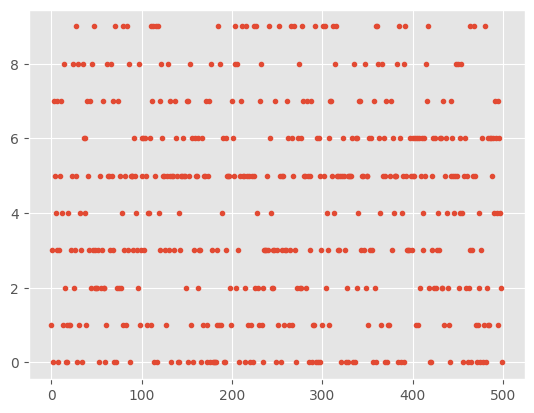

In [249]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


In [250]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

## Output
* Recommendation of product based on the current product selected by user.
* To recommend related product based on, Frequently bought together. 

#### Top words in each cluster based on product description

In [251]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 snow
 speed
 engine
 blower
 tool
 helps
 control
 year
 dust
 easy
Cluster 1:
 metal
 use
 outdoor
 drill
 concrete
 seal
 roofing
 rust
 downspout
 temperature
Cluster 2:
 storage
 shelves
 lbs
 adjustable
 finish
 shelf
 duty
 unit
 commercial
 use
Cluster 3:
 wall
 panels
 easy
 walls
 insulation
 sheet
 plate
 65
 door
 home
Cluster 4:
 post
 wood
 painted
 ft
 vary
 product
 proposition
 nbsp
 residents
 california
Cluster 5:
 light
 ft
 power
 watt
 air
 led
 kit
 fan
 volt
 cooling
Cluster 6:
 cycle
 oven
 cooking
 cu
 water
 wash
 steel
 steam
 ft
 easy
Cluster 7:
 frame
 fabric
 patio
 outdoor
 aluminum
 coated
 collection
 dining
 bronze
 cushions
Cluster 8:
 water
 toilet
 heater
 tank
 gal
 flush
 bowl
 easy
 gas
 spray
Cluster 9:
 steel
 wheels
 easy
 ball
 lb
 capacity
 vinyl
 construction
 features
 easily


D:\Installations\Anaconda\envs\bank\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Predicting clusters based on key search words

In [252]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

* **Keyword : ** cutting tool

In [253]:
show_recommendations("cutting tool")

Cluster 0:
 snow
 speed
 engine
 blower
 tool
 helps
 control
 year
 dust
 easy


* **Keyword : **spray paint

In [254]:
show_recommendations("spray paint")

Cluster 2:
 storage
 shelves
 lbs
 adjustable
 finish
 shelf
 duty
 unit
 commercial
 use


* **Keyword : **steel drill

In [255]:
show_recommendations("steel drill")

Cluster 1:
 metal
 use
 outdoor
 drill
 concrete
 seal
 roofing
 rust
 downspout
 temperature


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

* **Keyword : **water

In [256]:
show_recommendations("water")

Cluster 8:
 water
 toilet
 heater
 tank
 gal
 flush
 bowl
 easy
 gas
 spray


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

## Evaluation of all models

#### Popularity based Model

In [94]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Recommender model is', sqrt(MSE))

The RMSE value for Recommender model is 1.3078273121694615


#### Collaborative Based Filtering

In [92]:
print(len(testset))
type(testset)

4116


list

#### KNN with means

In [90]:
# Evalute on test set
test_pred = model.test(testset)
test_pred[0]

Prediction(uid='A25C2M3QF9G7OQ', iid='B009YSSLAU', r_ui=4.0, est=4.516699820834101, details={'actual_k': 10, 'was_impossible': False})

In [91]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0561


1.0561184327784499

#### SVD

In [129]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8718


0.8717742852178509

SVD has much better results over others

#### Summary: 

This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initially. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model-based collaborative filtering technique.